In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_incd=pd.read_csv("incd.csv")

In [3]:
data_incd.head()

index                         County   FIPS  \
0      0           US (SEER+NPCR)(1,10)      0   
1      1  Autauga County, Alabama(6,10)   1001   
2      2  Baldwin County, Alabama(6,10)   1003   
3      3  Barbour County, Alabama(6,10)   1005   
4      4     Bibb County, Alabama(6,10)   1007   

  Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
0                                               62.4   
1                                               74.9   
2                                               66.9   
3                                               74.6   
4                                               86.4   

  Lower 95% Confidence Interval Upper 95% Confidence Interval  \
0                          62.3                          62.6   
1                          65.1                          85.7   
2                          62.4                          71.7   
3                          61.8                          89.4   
4                            71                         104.2   

  Average Annual Count Recent Trend  \
0               214614      falling   
1                   43       stable   
2                  170       stable   
3                   25       stable   
4                   23       stable   

  Recent 5-Year Trend (ˆ) in Incidence Rates Lower 95% Confidence Interval.1  \
0                                       -2.5                              -3   
1                                        0.5                           -14.9   
2                                          3                           -10.2   
3                                       -6.4                           -18.3   
4                                       -4.5                           -31.4   

  Upper 95% Confidence Interval.1  
0                              -2  
1                            18.6  
2                            18.3  
3                             7.3  
4                            32.9

In [4]:
data_incd.describe()

index          FIPS
count  3141.000000   3141.000000
mean   1570.000000  30392.281757
std     906.872924  15158.200839
min       0.000000      0.000000
25%     785.000000  18179.000000
50%    1570.000000  29177.000000
75%    2355.000000  45081.000000
max    3140.000000  56045.000000

In [5]:
data_incd.isnull().sum()

index                                                 0
County                                                0
 FIPS                                                 0
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    0
Lower 95% Confidence Interval                         0
Upper 95% Confidence Interval                         0
Average Annual Count                                  0
Recent Trend                                          0
Recent 5-Year Trend (ˆ) in Incidence Rates            0
Lower 95% Confidence Interval.1                       0
Upper 95% Confidence Interval.1                       0
dtype: int64

In [6]:
data_incd.shape

(3141, 11)

In [7]:
data_incd.dtypes

index                                                  int64
County                                                object
 FIPS                                                  int64
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    object
Lower 95% Confidence Interval                         object
Upper 95% Confidence Interval                         object
Average Annual Count                                  object
Recent Trend                                          object
Recent 5-Year Trend (ˆ) in Incidence Rates            object
Lower 95% Confidence Interval.1                       object
Upper 95% Confidence Interval.1                       object
dtype: object

In [8]:
data_incd.columns

Index(['index', 'County', ' FIPS',
       'Age-Adjusted Incidence Rate(Ê) - cases per 100,000',
       'Lower 95% Confidence Interval', 'Upper 95% Confidence Interval',
       'Average Annual Count', 'Recent Trend',
       'Recent 5-Year Trend (ˆ) in Incidence Rates',
       'Lower 95% Confidence Interval.1', 'Upper 95% Confidence Interval.1'],
      dtype='object')

In [9]:
data_incd['Recent Trend'].value_counts() #analyzing the target variable

stable     2429
*           260
falling     200
_           192
rising       43
__           17
Name: Recent Trend, dtype: int64

There are few symbols like *,_ ,__ where the data is unavailable

In [10]:
data_incd.loc[data_incd['Recent Trend']=='*']

index                                    County   FIPS  \
68       68      Aleutians East Borough, Alaska(6,10)   2013   
69       69  Aleutians West Census Area, Alaska(6,10)   2016   
72       72         Bristol Bay Borough, Alaska(6,10)   2060   
73       73                      Denali, Alaska(6,10)   2068   
74       74      Dillingham Census Area, Alaska(6,10)   2070   
...     ...                                       ...    ...   
2930   2930            Lexington City, Virginia(6,10)  51678   
2933   2933        Manassas Park City, Virginia(6,10)  51685   
2963   2963         Garfield County, Washington(6,10)  53023   
3131   3131            Niobrara County, Wyoming(6,10)  56027   
3135   3135            Sublette County, Wyoming(6,10)  56035   

     Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
68                                                   *    
69                                                   *    
72                                                   *    
73                                                   *    
74                                                   *    
...                                                 ...   
2930                                              110.1   
2933                                                 *    
2963                                                 *    
3131                                                 *    
3135                                                 *    

     Lower 95% Confidence Interval Upper 95% Confidence Interval  \
68                               *                             *   
69                               *                             *   
72                               *                             *   
73                               *                             *   
74                               *                             *   
...                            ...                           ...   
2930                          75.5                           157   
2933                             *                             *   
2963                             *                             *   
3131                             *                             *   
3135                             *                             *   

     Average Annual Count Recent Trend  \
68             3 or fewer            *   
69             3 or fewer            *   
72             3 or fewer            *   
73             3 or fewer            *   
74             3 or fewer            *   
...                   ...          ...   
2930                    7            *   
2933           3 or fewer            *   
2963           3 or fewer            *   
3131           3 or fewer            *   
3135           3 or fewer            *   

     Recent 5-Year Trend (ˆ) in Incidence Rates  \
68                                            *   
69                                            *   
72                                            *   
73                                            *   
74                                            *   
...                                         ...   
2930                                          *   
2933                                          *   
2963                                          *   
3131                                          *   
3135                                          *   

     Lower 95% Confidence Interval.1 Upper 95% Confidence Interval.1  
68                                 *                               *  
69                                 *                               *  
72                                 *                               *  
73                                 *                               *  
74                                 *                               *  
...                              ...                             ...  
2930                               *                               *  
2933                     

All rows with Recent Trend as * can't be removed because there are values for it in other columns

In [11]:
data_incd.loc[data_incd['Recent Trend']=='_']

index                                County   FIPS  \
887     887               Allen County, Kansas(6)  20001   
888     888            Anderson County, Kansas(6)  20003   
889     889            Atchison County, Kansas(6)  20005   
890     890              Barber County, Kansas(6)  20007   
891     891              Barton County, Kansas(6)  20009   
...     ...                                   ...    ...   
1395   1395         Watonwan County, Minnesota(6)  27165   
1396   1396           Wilkin County, Minnesota(6)  27167   
1397   1397           Winona County, Minnesota(6)  27169   
1398   1398           Wright County, Minnesota(6)  27171   
1399   1399  Yellow Medicine County, Minnesota(6)  27173   

     Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
887                                                  _    
888                                                  _    
889                                                  _    
890                                                  _    
891                                                  _    
...                                                 ...   
1395                                                 _    
1396                                                 _    
1397                                                 _    
1398                                                 _    
1399                                                 _    

     Lower 95% Confidence Interval Upper 95% Confidence Interval  \
887                              _                             _   
888                              _                             _   
889                              _                             _   
890                              _                             _   
891                              _                             _   
...                            ...                           ...   
1395                             _                             _   
1396                             _                             _   
1397                             _                             _   
1398                             _                             _   
1399                             _                             _   

     Average Annual Count Recent Trend  \
887                     _            _   
888                     _            _   
889                     _            _   
890                     _            _   
891                     _            _   
...                   ...          ...   
1395                    _            _   
1396                    _            _   
1397                    _            _   
1398                    _            _   
1399                    _            _   

     Recent 5-Year Trend (ˆ) in Incidence Rates  \
887                                           _   
888                                           _   
889                                           _   
890                                           _   
891                                           _   
...                                         ...   
1395                                          _   
1396                                          _   
1397                                          _   
1398                                          _   
1399                                          _   

     Lower 95% Confidence Interval.1 Upper 95% Confidence Interval.1  
887                                _                               _  
888                                _                               _  
889                                _                               _  
890                                _                               _  
891                                _                               _  
...                              ...                             ...  
1395                               _                               _  
1396                               _                               _  
13

Rows with _ can be dropped as no data is available in any column

In [12]:
data_incd.drop(data_incd[data_incd['Recent Trend']=='_'].index,axis=0,inplace=True)

In [13]:
data_incd.loc[data_incd['Recent Trend']=='__']

index                        County   FIPS  \
1746   1746   Churchill County, Nevada(6)  32001   
1747   1747       Clark County, Nevada(6)  32003   
1748   1748     Douglas County, Nevada(6)  32005   
1749   1749        Elko County, Nevada(6)  32007   
1750   1750   Esmeralda County, Nevada(6)  32009   
1751   1751      Eureka County, Nevada(6)  32011   
1752   1752    Humboldt County, Nevada(6)  32013   
1753   1753      Lander County, Nevada(6)  32015   
1754   1754     Lincoln County, Nevada(6)  32017   
1755   1755        Lyon County, Nevada(6)  32019   
1756   1756     Mineral County, Nevada(6)  32021   
1757   1757         Nye County, Nevada(6)  32023   
1758   1758    Pershing County, Nevada(6)  32027   
1759   1759      Storey County, Nevada(6)  32029   
1760   1760      Washoe County, Nevada(6)  32031   
1761   1761  White Pine County, Nevada(6)  32033   
1762   1762        Carson City, Nevada(6)  32510   

     Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
1746                                                __    
1747                                                __    
1748                                                __    
1749                                                __    
1750                                                __    
1751                                                __    
1752                                                __    
1753                                                __    
1754                                                __    
1755                                                __    
1756                                                __    
1757                                                __    
1758                                                __    
1759                                                __    
1760                                                __    
1761                                                __    
1762                                                __    

     Lower 95% Confidence Interval Upper 95% Confidence Interval  \
1746                            __                            __   
1747                            __                            __   
1748                            __                            __   
1749                            __                            __   
1750                            __                            __   
1751                            __                            __   
1752                            __                            __   
1753                            __                            __   
1754                            __                            __   
1755                            __                            __   
1756                            __                            __   
1757                            __                            __   
1758                            __                            __   
1759                            __                            __   
1760                            __                            __   
1761                            __                            __   
1762                            __                            __   

     Average Annual Count Recent Trend  \
1746                   __           __   
1747                   __           __   
1748                   __           __   
1749                   __           __   
1750                   __           __   
1751                   __           __   
1752                   __           __   
1753                   __           __   
1754                   __           __   
1755                   __           __   
1756                   __           __   
1757                   __           __   
1758                   __           __   
1759                   __           __   
1760                   __           __   
1761                   __           __   
1762                   __           __   

     Recent 5-Year Trend

Rows with __ can be dropped as no data is available in any column

In [14]:
data_incd.drop(data_incd[data_incd['Recent Trend']=='__'].index,axis=0,inplace=True)

In [15]:
data_incd.loc[data_incd['Lower 95% Confidence Interval']=='*']

index                                    County   FIPS  \
68       68      Aleutians East Borough, Alaska(6,10)   2013   
69       69  Aleutians West Census Area, Alaska(6,10)   2016   
72       72         Bristol Bay Borough, Alaska(6,10)   2060   
73       73                      Denali, Alaska(6,10)   2068   
74       74      Dillingham Census Area, Alaska(6,10)   2070   
...     ...                                       ...    ...   
2862   2862           Highland County, Virginia(6,10)  51091   
2933   2933        Manassas Park City, Virginia(6,10)  51685   
2963   2963         Garfield County, Washington(6,10)  53023   
3131   3131            Niobrara County, Wyoming(6,10)  56027   
3135   3135            Sublette County, Wyoming(6,10)  56035   

     Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
68                                                   *    
69                                                   *    
72                                                   *    
73                                                   *    
74                                                   *    
...                                                 ...   
2862                                                 *    
2933                                                 *    
2963                                                 *    
3131                                                 *    
3135                                                 *    

     Lower 95% Confidence Interval Upper 95% Confidence Interval  \
68                               *                             *   
69                               *                             *   
72                               *                             *   
73                               *                             *   
74                               *                             *   
...                            ...                           ...   
2862                             *                             *   
2933                             *                             *   
2963                             *                             *   
3131                             *                             *   
3135                             *                             *   

     Average Annual Count Recent Trend  \
68             3 or fewer            *   
69             3 or fewer            *   
72             3 or fewer            *   
73             3 or fewer            *   
74             3 or fewer            *   
...                   ...          ...   
2862           3 or fewer            *   
2933           3 or fewer            *   
2963           3 or fewer            *   
3131           3 or fewer            *   
3135           3 or fewer            *   

     Recent 5-Year Trend (ˆ) in Incidence Rates  \
68                                            *   
69                                            *   
72                                            *   
73                                            *   
74                                            *   
...                                         ...   
2862                                          *   
2933                                          *   
2963                                          *   
3131                                          *   
3135                                          *   

     Lower 95% Confidence Interval.1 Upper 95% Confidence Interval.1  
68                                 *                               *  
69                                 *                               *  
72                                 *                               *  
73                                 *                               *  
74                                 *                               *  
...                              ...                             ...  
2862                               *                               *  
2933                     

Here all the rows are confidential and the annual count is 3 or fewer so these rows can be dropped

In [16]:
data_incd.drop(data_incd[data_incd['Lower 95% Confidence Interval']=='*'].index,axis=0,inplace=True)

In [17]:
data_incd.loc[data_incd['Recent Trend']=='*']

index                                   County   FIPS  \
85       85   Northwest Arctic Borough, Alaska(6,10)   2188   
94       94  Yukon-Koyukuk Census Area, Alaska(6,10)   2290   
210     210             Mono County, California(7,9)   6051   
253     253       Clear Creek County, Colorado(6,10)   8019   
269     269          Gunnison County, Colorado(6,10)   8051   
302     302            Summit County, Colorado(6,10)   8117   
389     389               Baker County, Georgia(7,9)  13007   
411     411       Chattahoochee County, Georgia(7,9)  13053   
415     415                Clay County, Georgia(7,9)  13061   
451     451                Greene County, Georgia(7)  13133   
455     455               Hancock County, Georgia(7)  13141   
464     464                Jasper County, Georgia(7)  13159   
466     466             Jefferson County, Georgia(7)  13163   
489     489                Morgan County, Georgia(7)  13211   
502     502                Putnam County, Georgia(7)  13237   
534     534                Warren County, Georgia(7)  13301   
535     535            Washington County, Georgia(7)  13303   
588     588                Power County, Idaho(6,10)  16077   
867     867                 Ringgold County, Iowa(7)  19159   
1462   1462        Sharkey County, Mississippi(6,10)  28125   
1626   1626            Meagher County, Montana(6,10)  30059   
1642   1642           Sheridan County, Montana(6,10)  30091   
1668   1668            Cherry County, Nebraska(6,10)  31031   
1719   1719            Pawnee County, Nebraska(6,10)  31133   
1742   1742             Wayne County, Nebraska(6,10)  31179   
1795   1795             Catron County, New Mexico(7)  35003   
1993   1993     Bottineau County, North Dakota(6,10)  38009   
2003   2003        Emmons County, North Dakota(6,10)  38029   
2015   2015      McKenzie County, North Dakota(6,10)  38053   
2023   2023        Pierce County, North Dakota(6,10)  38069   
2361   2361        Aurora County, South Dakota(6,10)  46003   
2379   2379         Deuel County, South Dakota(6,10)  46039   
2380   2380         Dewey County, South Dakota(6,10)  46041   
2388   2388        Hamlin County, South Dakota(6,10)  46057   
2403   2403        McCook County, South Dakota(6,10)  46087   
2543   2543             Brewster County, Texas(6,10)  48043   
2562   2562                 Coke County, Texas(6,10)  48081   
2597   2597               Fisher County, Texas(6,10)  48151   
2625   2625              Haskell County, Texas(6,10)  48207   
2627   2627             Hemphill County, Texas(6,10)  48211   
2706   2706               Parmer County, Texas(6,10)  48369   
2714   2714                 Real County, Texas(6,10)  48385   
2785   2785                    Grand County, Utah(7)  49019   
2788   2788                     Kane County, Utah(7)  49025   
2789   2789                  Millard County, Utah(7)  49027   
2801   2801                  Wasatch County, Utah(7)  49051   
2930   2930           Lexington City, Virginia(6,10)  51678   

     Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
85                                                 67.6   
94                                                 58.3   
210                                                24.6   
253                                                38.1   
269                                                24.8   
302                                                14.8   
389                                                72.9   
411                                                84.3   
415                                                64.1   
451                                                69.9   
455                                                38.8   
464                                                78.7   
466                                                62.8   
489                                                65.5   
502                                                74.4   
534                                  

In [18]:
Rows=data_incd[data_incd[['Recent 5-Year Trend (ˆ) in Incidence Rates','Lower 95% Confidence Interval.1','Upper 95% Confidence Interval.1']].isin(['*'])==False]

In [19]:
Rows['Recent 5-Year Trend (ˆ) in Incidence Rates']=Rows['Recent 5-Year Trend (ˆ) in Incidence Rates'].astype('float64')
Rows['Lower 95% Confidence Interval.1']=Rows['Lower 95% Confidence Interval.1'].astype('float64')
Rows['Upper 95% Confidence Interval.1']=Rows['Upper 95% Confidence Interval.1'].astype('float64')


In [20]:
Avg_Recent=Rows['Recent 5-Year Trend (ˆ) in Incidence Rates'].mean()
Avg_Lower=Rows['Lower 95% Confidence Interval.1'].mean()
Avg_Upper=Rows['Upper 95% Confidence Interval.1'].mean()

print(Avg_Recent)
print(Avg_Lower)
print(Avg_Upper)

-1.461714071856287
-17.797791916167718
20.707035928143743


In [21]:
data_incd['Recent 5-Year Trend (ˆ) in Incidence Rates']=data_incd['Recent 5-Year Trend (ˆ) in Incidence Rates'].replace('*',Avg_Recent)
data_incd['Lower 95% Confidence Interval.1']=data_incd['Lower 95% Confidence Interval.1'].replace('*',Avg_Lower)
data_incd['Upper 95% Confidence Interval.1']=data_incd['Upper 95% Confidence Interval.1'].replace('*',Avg_Upper)

In [22]:
data_incd['Recent Trend']=data_incd['Recent Trend'].replace('*','confidential')

In [23]:
data_incd['Recent Trend'].value_counts()

stable          2429
falling          200
confidential      47
rising            43
Name: Recent Trend, dtype: int64

For certain county, Data do not include cases diagnosed in other states for those states in which the data exchange agreement specifically prohibits the release of data to third parties which is represented by a # in the Age-Adjusted Incidence Rate(Ê) - cases per 100,000 column

In [24]:
def func(x):
    x=x.strip()
    if x.endswith('#'):
        y=x.replace('#','')
        return y
    else:
        return x

In [25]:
data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000']=data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].apply(lambda x:func(x))

In [26]:
data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].value_counts()

65.2     19
71.5     12
66.3     12
68.9     12
66.1     11
         ..
61.9      1
84        1
54.6      1
60        1
23.7      1
Name: Age-Adjusted Incidence Rate(Ê) - cases per 100,000, Length: 810, dtype: int64

In [27]:
data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000']=data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'].astype('float64')
data_incd['Lower 95% Confidence Interval']=data_incd['Lower 95% Confidence Interval'].astype('float64')
data_incd['Lower 95% Confidence Interval']=data_incd['Lower 95% Confidence Interval'].astype('float64')
data_incd['Upper 95% Confidence Interval']=data_incd['Upper 95% Confidence Interval'].astype('float64')
data_incd['Average Annual Count']=data_incd['Average Annual Count'].astype('float64')
data_incd['Recent 5-Year Trend (ˆ) in Incidence Rates']=data_incd['Recent 5-Year Trend (ˆ) in Incidence Rates'].astype('float64')
data_incd['Lower 95% Confidence Interval.1']=data_incd['Lower 95% Confidence Interval.1'].astype('float64')
data_incd['Upper 95% Confidence Interval.1']=data_incd['Upper 95% Confidence Interval.1'].astype('float64')

In [28]:
data_incd.dtypes

index                                                   int64
County                                                 object
 FIPS                                                   int64
Age-Adjusted Incidence Rate(Ê) - cases per 100,000    float64
Lower 95% Confidence Interval                         float64
Upper 95% Confidence Interval                         float64
Average Annual Count                                  float64
Recent Trend                                           object
Recent 5-Year Trend (ˆ) in Incidence Rates            float64
Lower 95% Confidence Interval.1                       float64
Upper 95% Confidence Interval.1                       float64
dtype: object

In [29]:
data_incd.head()

index                         County   FIPS  \
0      0           US (SEER+NPCR)(1,10)      0   
1      1  Autauga County, Alabama(6,10)   1001   
2      2  Baldwin County, Alabama(6,10)   1003   
3      3  Barbour County, Alabama(6,10)   1005   
4      4     Bibb County, Alabama(6,10)   1007   

   Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
0                                               62.4    
1                                               74.9    
2                                               66.9    
3                                               74.6    
4                                               86.4    

   Lower 95% Confidence Interval  Upper 95% Confidence Interval  \
0                           62.3                           62.6   
1                           65.1                           85.7   
2                           62.4                           71.7   
3                           61.8                           89.4   
4                           71.0                          104.2   

   Average Annual Count Recent Trend  \
0              214614.0      falling   
1                  43.0       stable   
2                 170.0       stable   
3                  25.0       stable   
4                  23.0       stable   

   Recent 5-Year Trend (ˆ) in Incidence Rates  \
0                                        -2.5   
1                                         0.5   
2                                         3.0   
3                                        -6.4   
4                                        -4.5   

   Lower 95% Confidence Interval.1  Upper 95% Confidence Interval.1  
0                             -3.0                             -2.0  
1                            -14.9                             18.6  
2                            -10.2                             18.3  
3                            -18.3                              7.3  
4                            -31.4                             32.9

Now the data has no special characters and all of them belong to a particular datatype

# Outliers

In [30]:
def outliers(data_incd,var):
    sns.boxplot(data_incd[var])

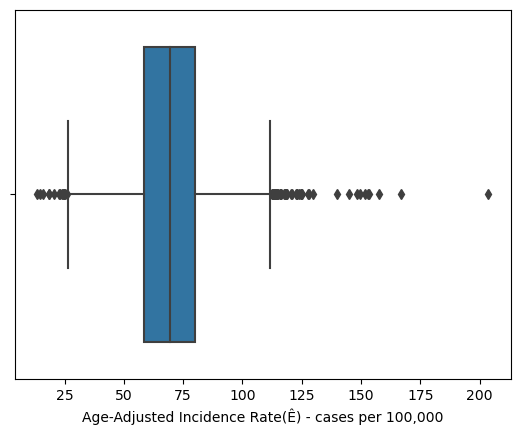

In [31]:
outliers(data_incd,'Age-Adjusted Incidence Rate(Ê) - cases per 100,000')

In [32]:
Q1 = np.percentile(data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print('IQR:',IQR)

IQR: 21.500000000000007


In [33]:
upper = Q3 +1.5*IQR
print('Upper:',upper)
lower = Q1 -1.5*IQR
print('Lower:',lower)
    

Upper: 112.15000000000002
Lower: 26.149999999999984


In [34]:
data_incd=data_incd[(data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000']>lower) & (data_incd['Age-Adjusted Incidence Rate(Ê) - cases per 100,000']<upper)]

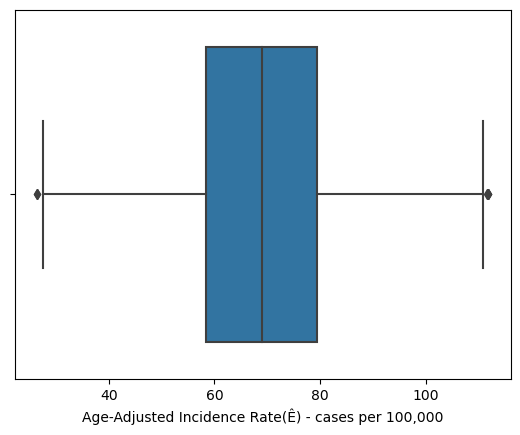

In [35]:
outliers(data_incd,'Age-Adjusted Incidence Rate(Ê) - cases per 100,000')

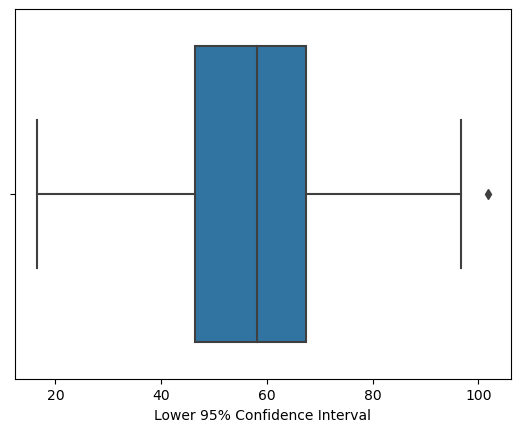

In [36]:
outliers(data_incd,'Lower 95% Confidence Interval')

In [37]:
Q1 = np.percentile(data_incd['Lower 95% Confidence Interval'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_incd['Lower 95% Confidence Interval'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print('IQR:',IQR)

IQR: 21.0


In [38]:
upper = Q3 +1.5*IQR
print('Upper:',upper)
lower = Q1 -1.5*IQR
print('Lower:',lower)

Upper: 99.0
Lower: 15.0


In [39]:
data_incd=data_incd[(data_incd['Lower 95% Confidence Interval']>lower) & (data_incd['Lower 95% Confidence Interval']<upper)]

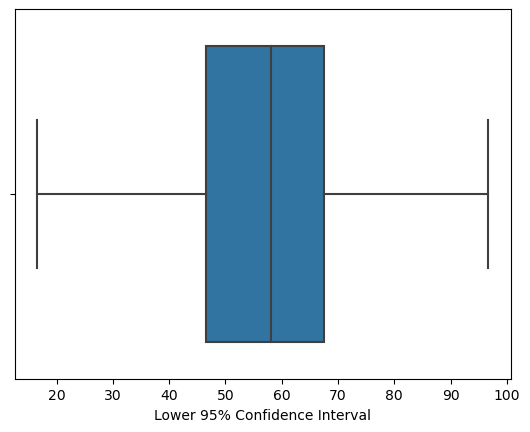

In [40]:
outliers(data_incd,'Lower 95% Confidence Interval')

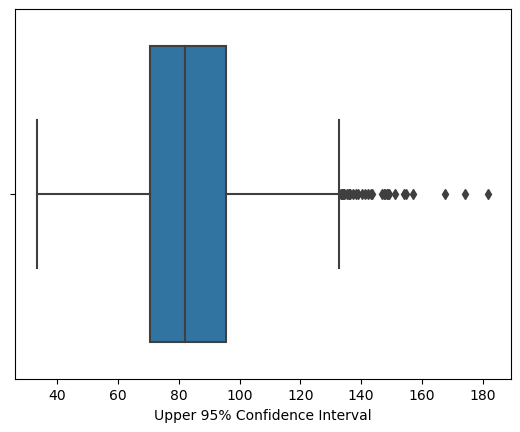

In [41]:
outliers(data_incd,'Upper 95% Confidence Interval')

In [42]:
Q1 = np.percentile(data_incd['Upper 95% Confidence Interval'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_incd['Upper 95% Confidence Interval'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print('IQR:',IQR)

IQR: 25.19999999999999


In [43]:
upper = Q3 +1.5*IQR
print('Upper:',upper)
lower = Q1 -1.5*IQR
print('Lower:',lower)

Upper: 133.39999999999998
Lower: 32.60000000000002


In [44]:
data_incd=data_incd[(data_incd['Upper 95% Confidence Interval']>lower) & (data_incd['Upper 95% Confidence Interval']<upper)]

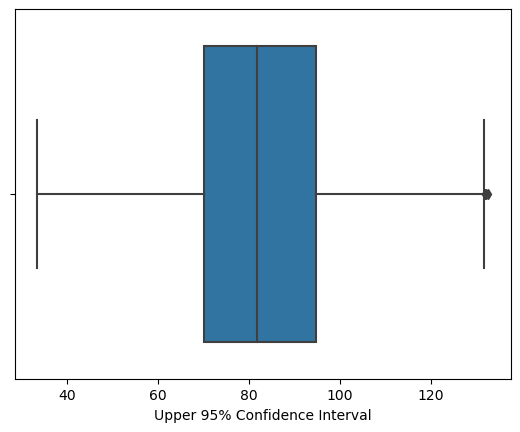

In [45]:
outliers(data_incd,'Upper 95% Confidence Interval')

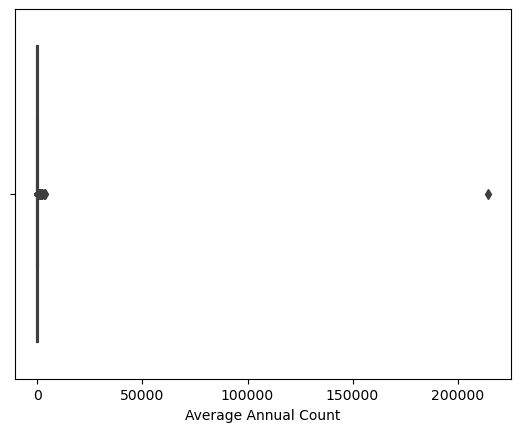

In [46]:
outliers(data_incd,'Average Annual Count')

In [47]:
Q1 = np.percentile(data_incd['Average Annual Count'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_incd['Average Annual Count'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print('IQR:',IQR)

IQR: 54.0


In [48]:
upper = Q3 +1.5*IQR
print('Upper:',upper)
lower = Q1 -1.5*IQR
print('Lower:',lower)

Upper: 149.0
Lower: -67.0


In [49]:
data_incd=data_incd[(data_incd['Average Annual Count']>lower) & (data_incd['Average Annual Count']<upper)]

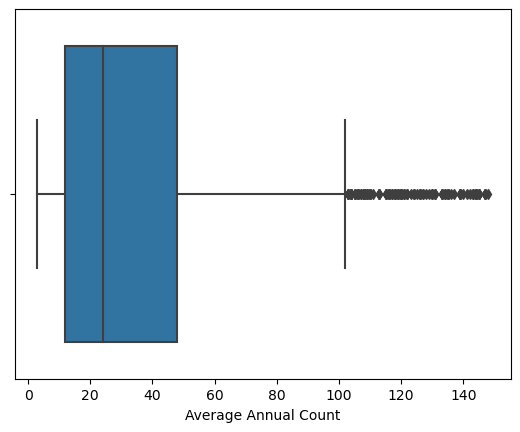

In [50]:
outliers(data_incd,'Average Annual Count')

The Average Annual Count seems to be varying for all County in huge way and hence outliers could be treated only to some extent

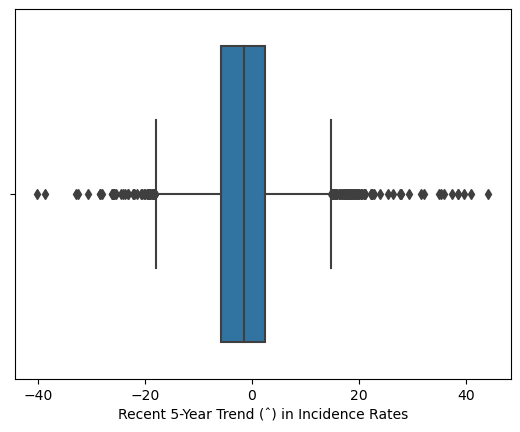

In [51]:
outliers(data_incd,'Recent 5-Year Trend (ˆ) in Incidence Rates')

In [52]:
Q1 = np.percentile(data_incd['Recent 5-Year Trend (ˆ) in Incidence Rates'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_incd['Recent 5-Year Trend (ˆ) in Incidence Rates'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print('IQR:',IQR)

IQR: 8.2


In [53]:
upper = Q3 +1.5*IQR
print('Upper:',upper)
lower = Q1 -1.5*IQR
print('Lower:',lower)

Upper: 14.7
Lower: -18.099999999999998


In [54]:
data_incd=data_incd[(data_incd['Recent 5-Year Trend (ˆ) in Incidence Rates']>lower) & (data_incd['Recent 5-Year Trend (ˆ) in Incidence Rates']<upper)]

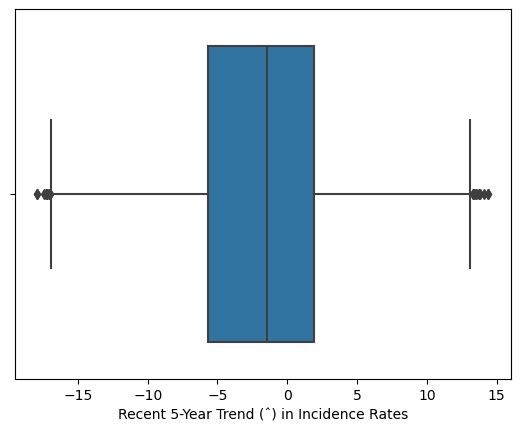

In [55]:
outliers(data_incd,'Recent 5-Year Trend (ˆ) in Incidence Rates')

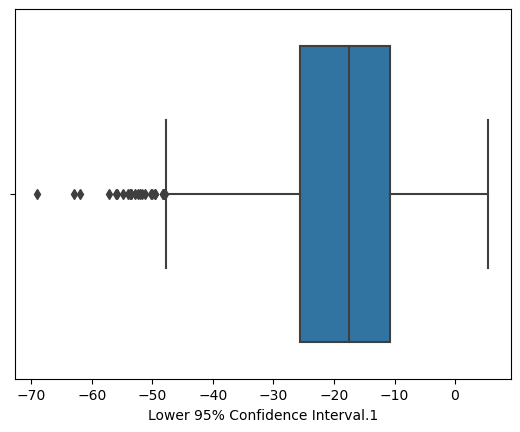

In [56]:
outliers(data_incd,'Lower 95% Confidence Interval.1')

In [57]:
Q1 = np.percentile(data_incd['Lower 95% Confidence Interval.1'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_incd['Lower 95% Confidence Interval.1'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print('IQR:',IQR)

IQR: 14.900000000000002


In [58]:
upper = Q3 +1.5*IQR
print('Upper:',upper)
lower = Q1 -1.5*IQR
print('Lower:',lower)

Upper: 11.650000000000002
Lower: -47.95


In [59]:
data_incd=data_incd[(data_incd['Lower 95% Confidence Interval.1']>lower) & (data_incd['Lower 95% Confidence Interval.1']<upper)]

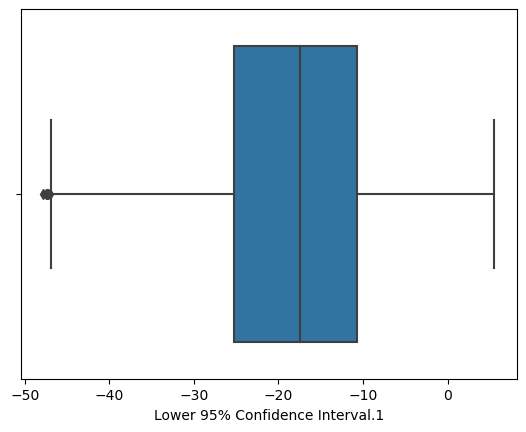

In [60]:
outliers(data_incd,'Lower 95% Confidence Interval.1')

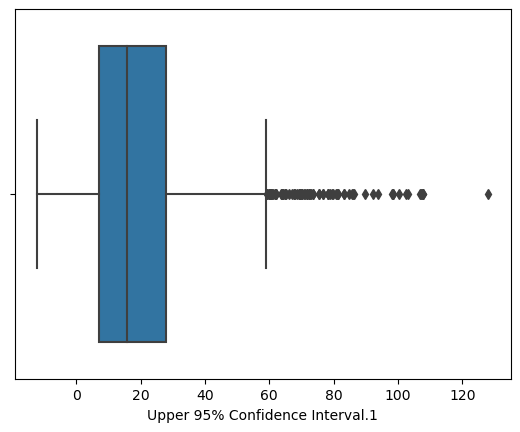

In [61]:
outliers(data_incd,'Upper 95% Confidence Interval.1')

In [62]:
Q1 = np.percentile(data_incd['Upper 95% Confidence Interval.1'], 25,interpolation = 'midpoint')
Q3 = np.percentile(data_incd['Upper 95% Confidence Interval.1'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print('IQR:',IQR)

IQR: 20.85


In [63]:
upper = Q3 +1.5*IQR
print('Upper:',upper)
lower = Q1 -1.5*IQR
print('Lower:',lower)

Upper: 59.075
Lower: -24.325000000000003


In [64]:
data_incd=data_incd[(data_incd['Upper 95% Confidence Interval.1']>lower) & (data_incd['Upper 95% Confidence Interval.1']<upper)]

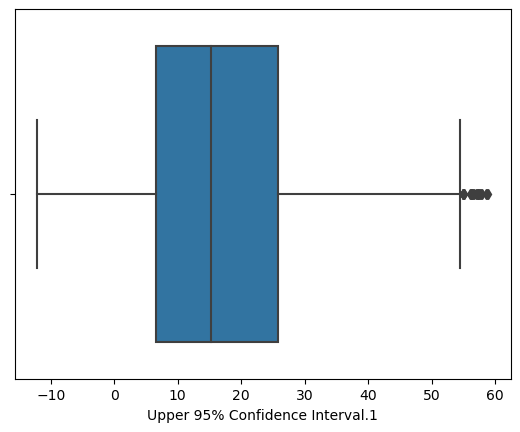

In [65]:
outliers(data_incd,'Upper 95% Confidence Interval.1')

Data is prepared for EDA and Model

# Univariate Analysis

<AxesSubplot:xlabel='Recent Trend', ylabel='count'>

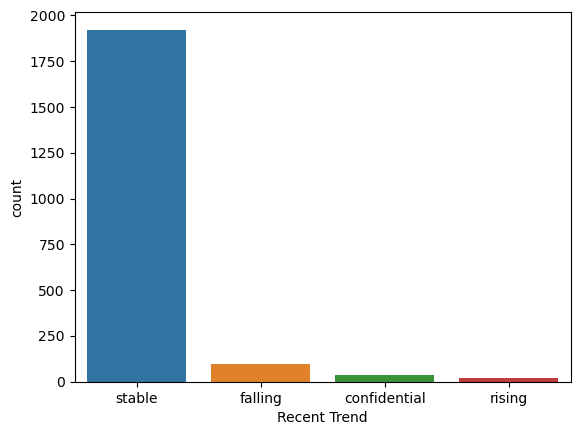

In [66]:
sns.countplot(data_incd['Recent Trend'])

For most County the trend is stable

In [67]:
def UVA(data_incd,var):
    sns.distplot(data_incd[var],kde='True')
    plt.xlabel(var)
    plt.ylabel('Frequency')

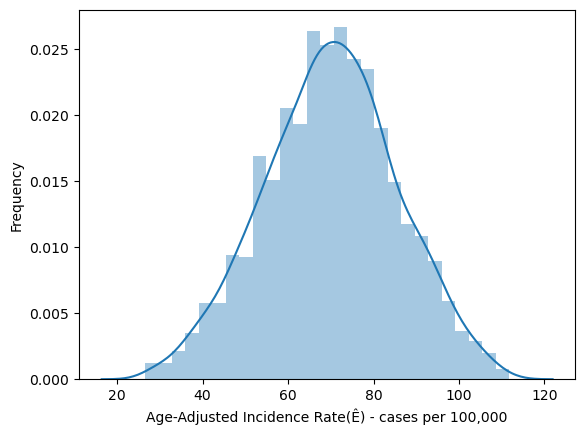

In [68]:
UVA(data_incd,'Age-Adjusted Incidence Rate(Ê) - cases per 100,000')

The above feature is normally distributed

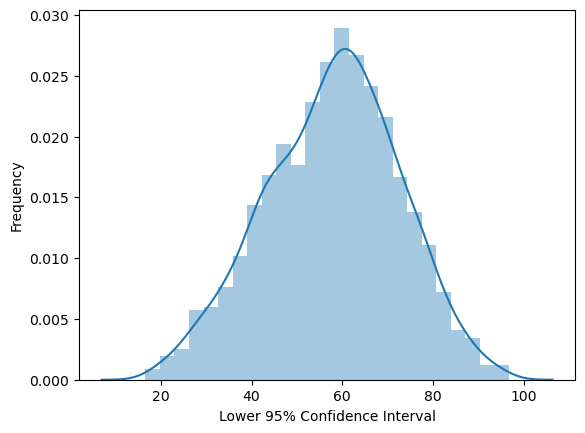

In [69]:
UVA(data_incd,'Lower 95% Confidence Interval')

The above feature is normally distributed

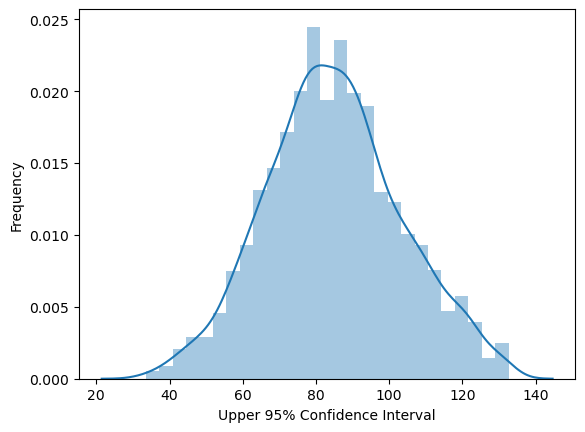

In [70]:
UVA(data_incd,'Upper 95% Confidence Interval')

The above feature is normally distributed

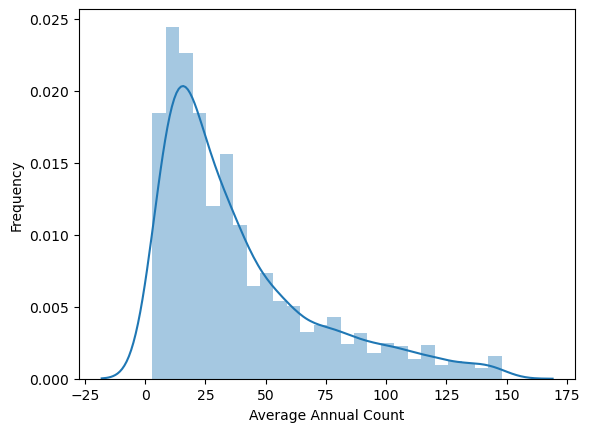

In [71]:
UVA(data_incd,'Average Annual Count')

The above feature is right skewed

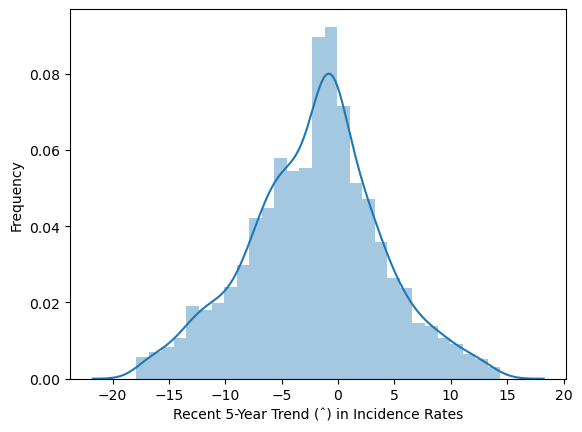

In [72]:
UVA(data_incd,'Recent 5-Year Trend (ˆ) in Incidence Rates')

The above feature is normally distributed

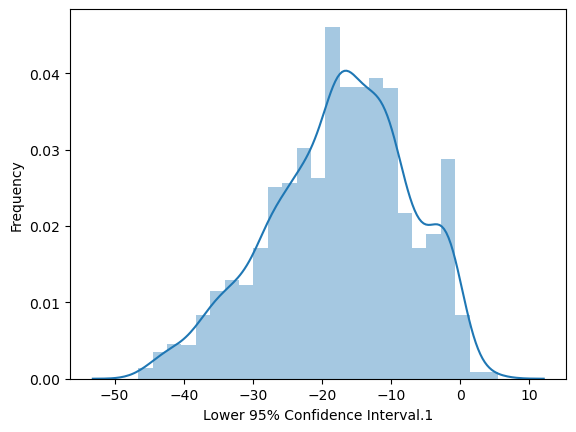

In [73]:
UVA(data_incd,'Lower 95% Confidence Interval.1')

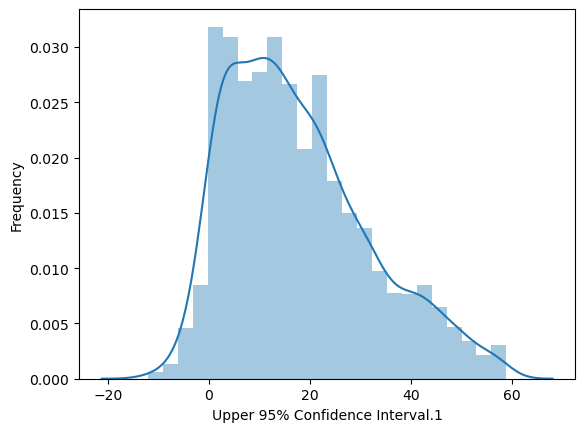

In [74]:
UVA(data_incd,'Upper 95% Confidence Interval.1')

# Bivariate Analysis

<AxesSubplot:xlabel='Recent Trend', ylabel='Age-Adjusted Incidence Rate(Ê) - cases per 100,000'>

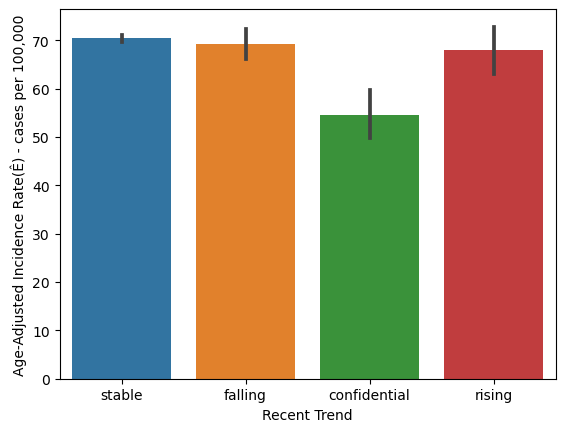

In [75]:
sns.barplot(data=data_incd,x='Recent Trend',y='Age-Adjusted Incidence Rate(Ê) - cases per 100,000')

With respect to age adjusted incidence rates except confidential the others trends are almost similar in number

<AxesSubplot:xlabel='Recent Trend', ylabel='Average Annual Count'>

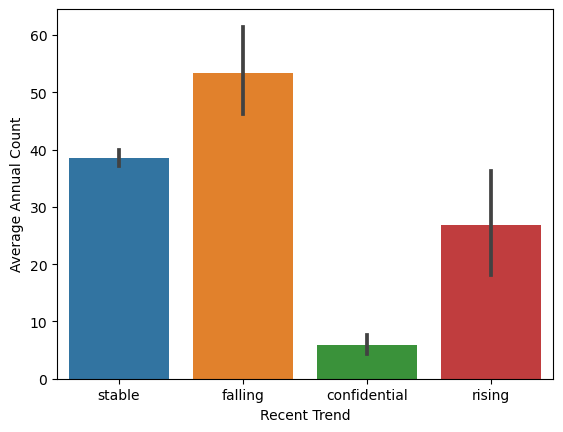

In [76]:
sns.barplot(data=data_incd,x='Recent Trend',y='Average Annual Count')

With respect to Average Annual Count, the trend is mostly falling

<AxesSubplot:xlabel='Recent Trend', ylabel='Recent 5-Year Trend (ˆ) in Incidence Rates'>

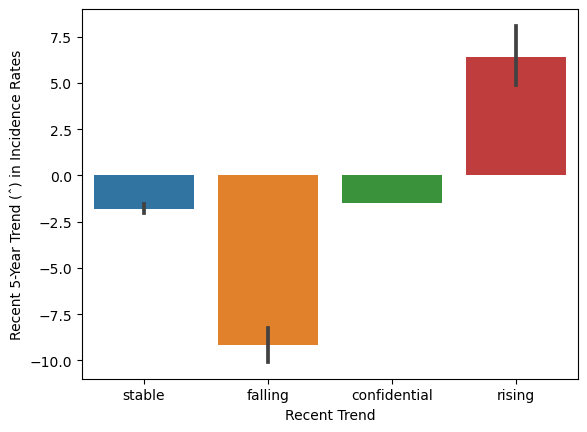

In [77]:
sns.barplot(data=data_incd,x='Recent Trend',y='Recent 5-Year Trend (ˆ) in Incidence Rates')

With respect to recent 5 year trend, only the rising trend is higher

<AxesSubplot:>

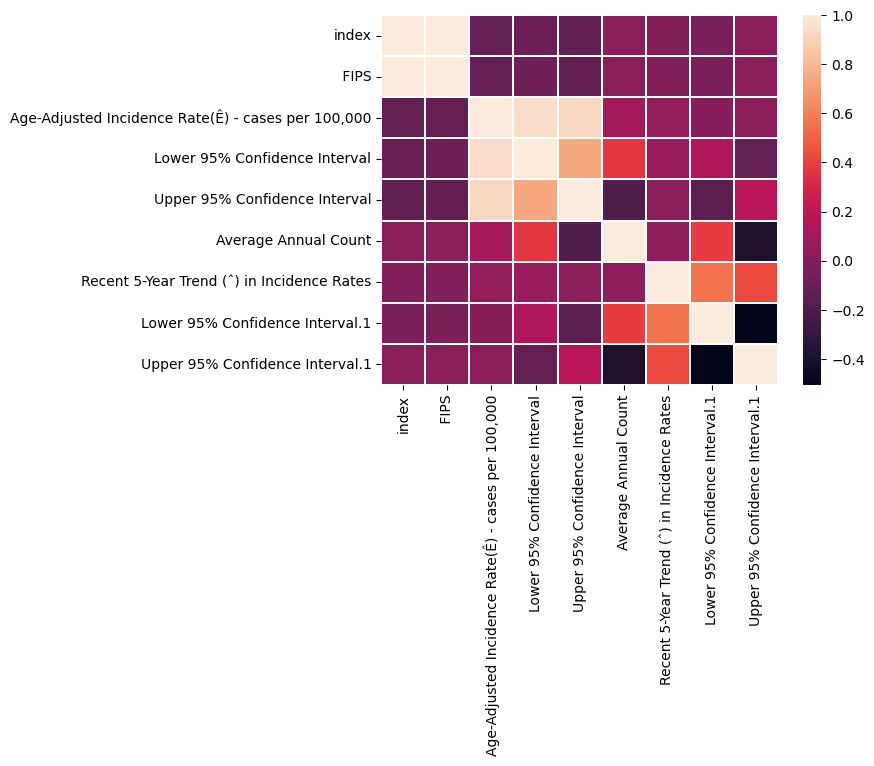

In [78]:
sns.heatmap(data_incd.corr(),linewidths=0.2)

# Multivariate Analysis

<AxesSubplot:xlabel='Age-Adjusted Incidence Rate(Ê) - cases per 100,000', ylabel='Average Annual Count'>

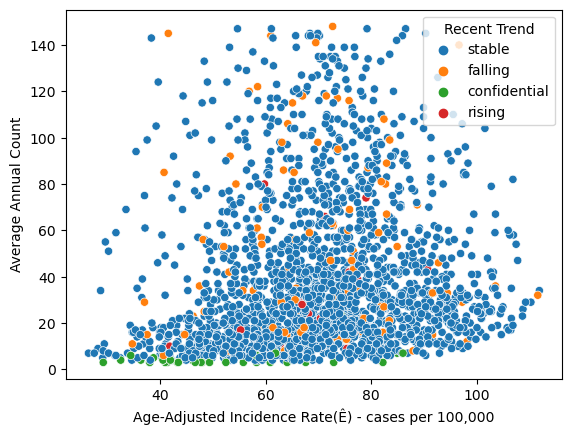

In [79]:
sns.scatterplot(data=data_incd,x='Age-Adjusted Incidence Rate(Ê) - cases per 100,000',y='Average Annual Count',hue='Recent Trend')

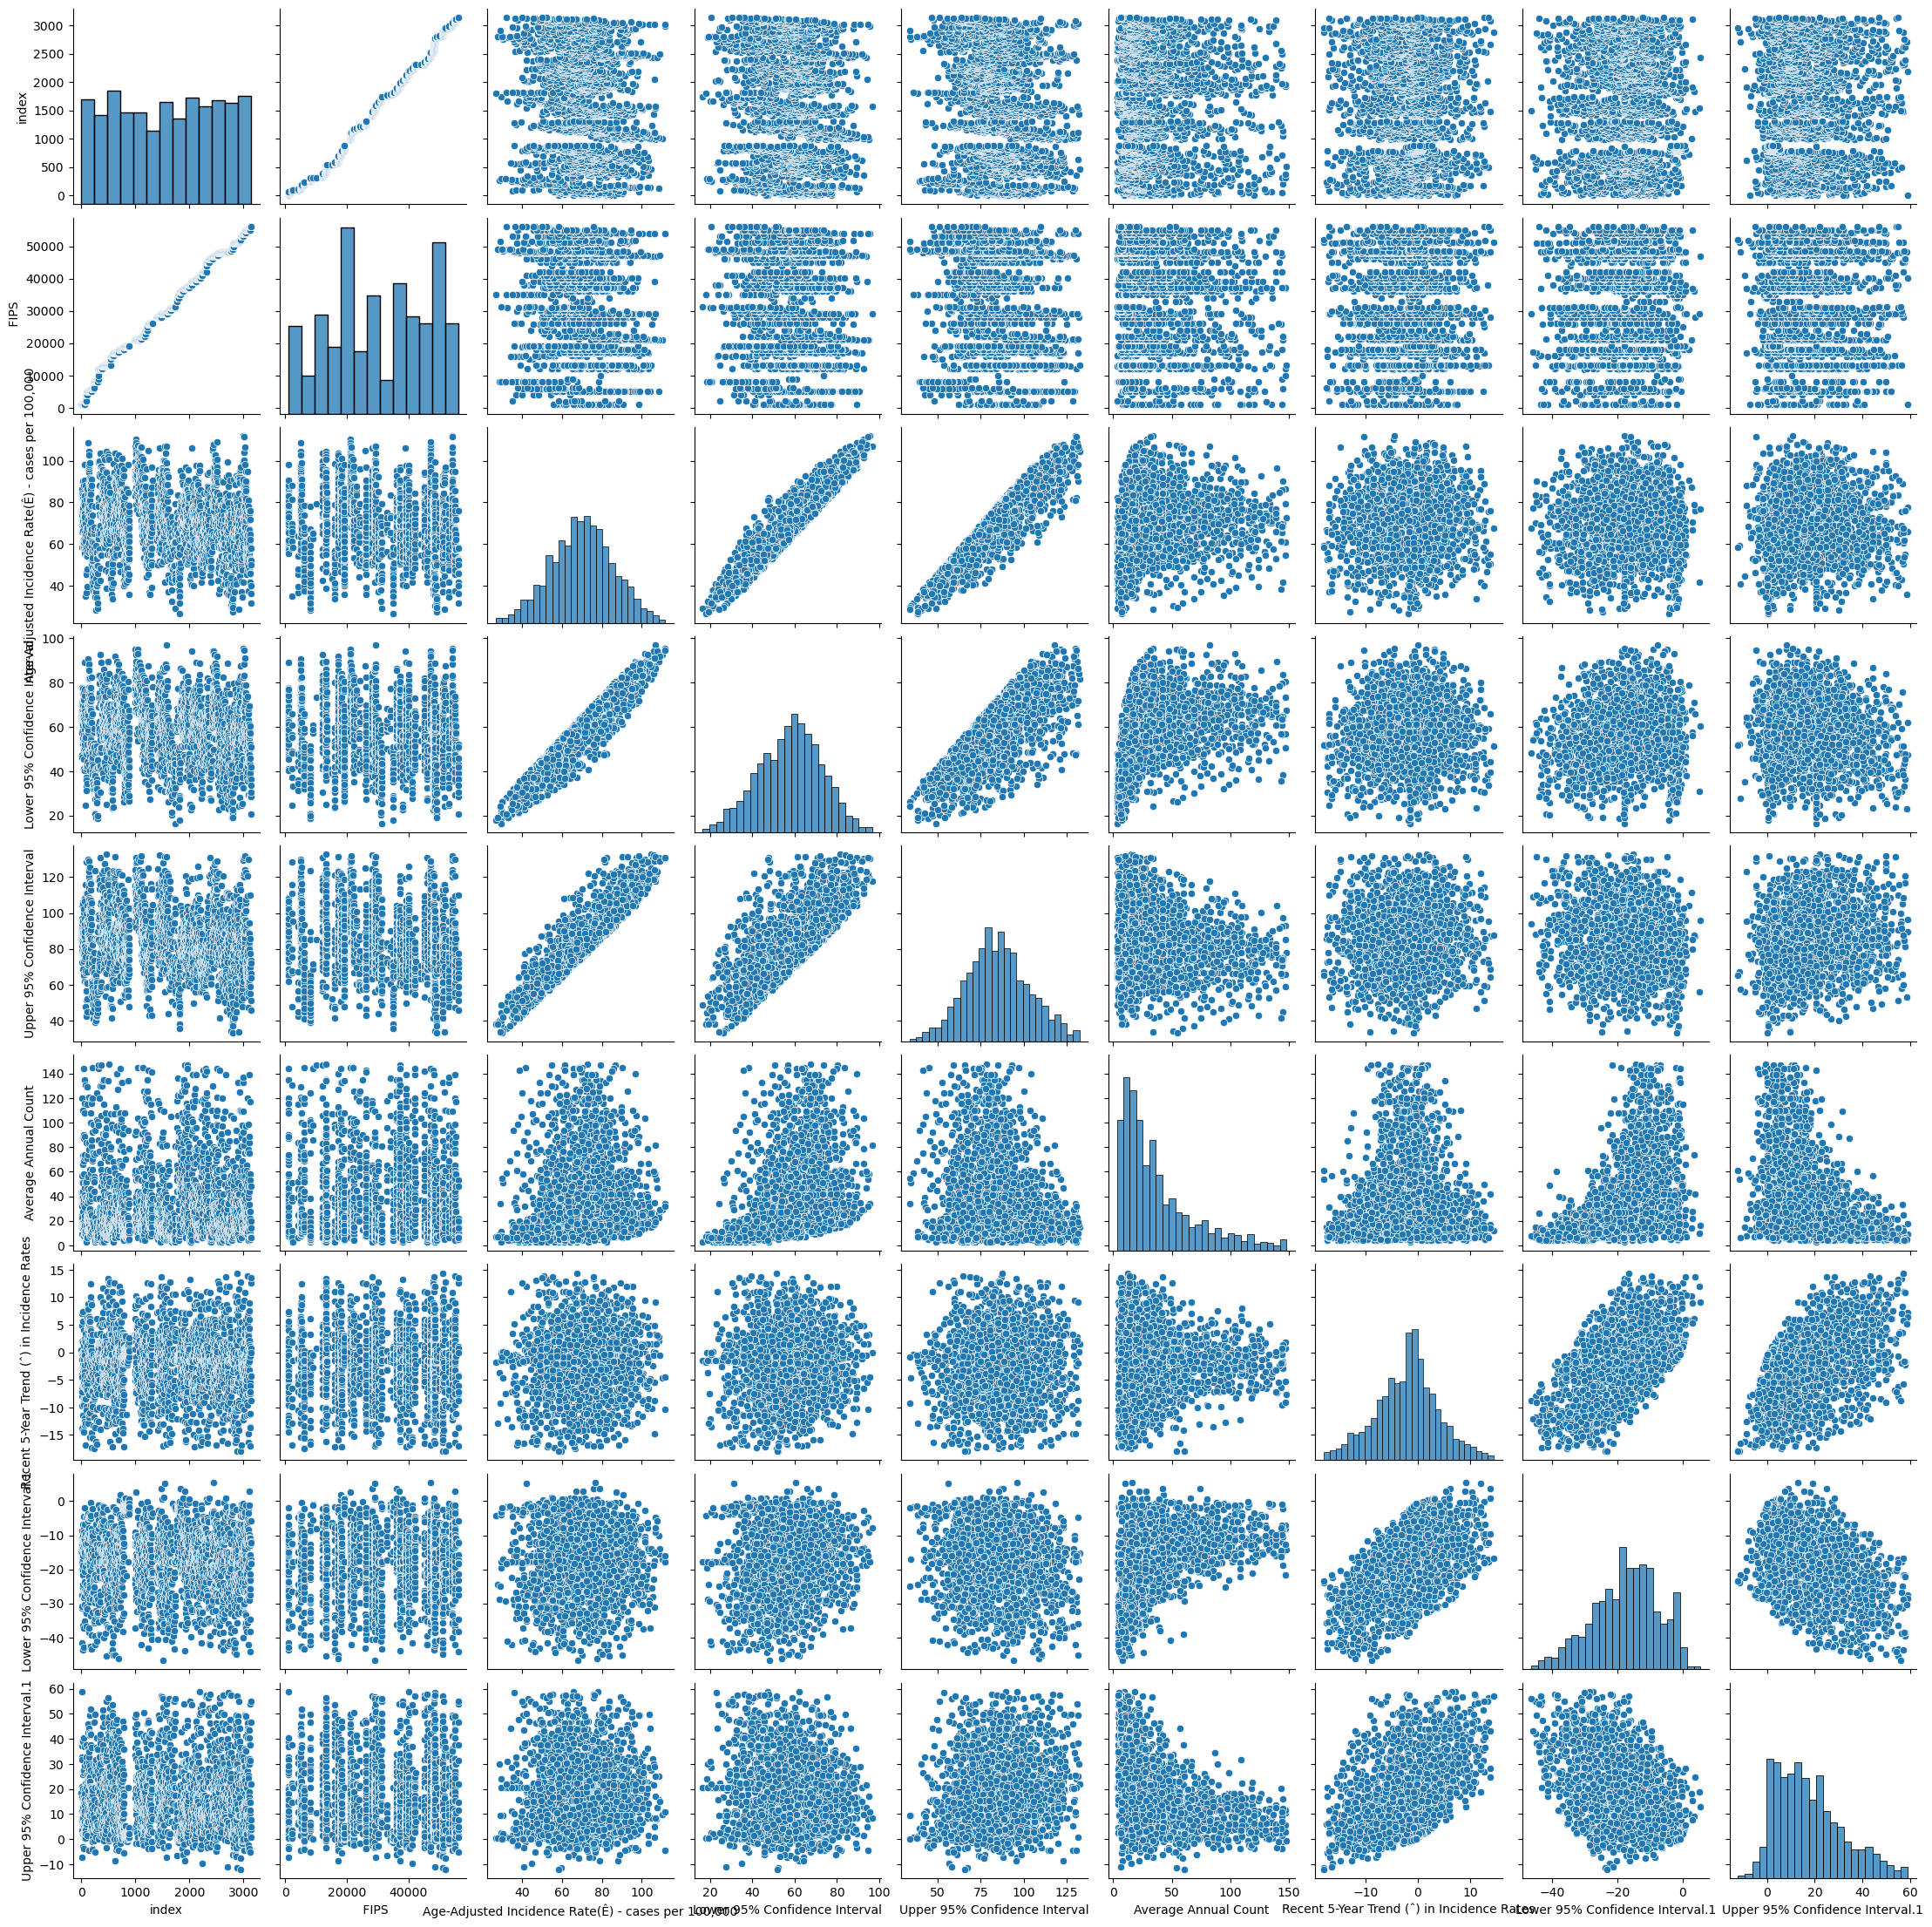

In [80]:
sns.pairplot(data_incd)

In [81]:
data_incd.describe()

index          FIPS  \
count  2081.000000   2081.000000   
mean   1588.061989  30729.917828   
std     927.924573  15504.456327   
min       1.000000   1001.000000   
25%     745.000000  18099.000000   
50%    1586.000000  29211.000000   
75%    2398.000000  46077.000000   
max    3139.000000  56043.000000   

       Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
count                                        2081.000000    
mean                                           70.055070    
std                                            15.540096    
min                                            26.500000    
25%                                            59.500000    
50%                                            70.300000    
75%                                            80.400000    
max                                           111.800000    

       Lower 95% Confidence Interval  Upper 95% Confidence Interval  \
count                    2081.000000                    2081.000000   
mean                       57.872369                      84.842239   
std                        14.767539                      18.469283   
min                        16.600000                      33.500000   
25%                        47.600000                      72.700000   
50%                        58.700000                      84.300000   
75%                        68.300000                      96.300000   
max                        96.700000                     132.600000   

       Average Annual Count  Recent 5-Year Trend (ˆ) in Incidence Rates  \
count           2081.000000                                 2081.000000   
mean              38.460356                                   -2.051872   
std               32.349719                                    5.909118   
min                3.000000                                  -17.900000   
25%               15.000000                                   -5.800000   
50%               28.000000                                   -1.500000   
75%               52.000000                                    1.500000   
max              148.000000                                   14.400000   

       Lower 95% Confidence Interval.1  Upper 95% Confidence Interval.1  
count                      2081.000000                      2081.000000  
mean                        -17.491694                        17.615458  
std                          10.078517                        14.073481  
min                         -46.600000                       -12.100000  
25%                         -24.100000                         6.600000  
50%                         -16.900000                        15.200000  
75%                         -10.400000                        25.800000  
max                           5.500000                        58.900000

# Model Building

In [82]:
x=data_incd.drop(columns=['index','County','Recent Trend'])

In [83]:
y=data_incd['Recent Trend']

In [84]:
x

FIPS  Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
1      1001                                               74.9    
3      1005                                               74.6    
4      1007                                               86.4    
5      1009                                               69.7    
6      1011                                               65.8    
...     ...                                                ...    
3133  56031                                               52.0    
3134  56033                                               52.0    
3136  56037                                               39.9    
3138  56041                                               31.7    
3139  56043                                               50.0    

      Lower 95% Confidence Interval  Upper 95% Confidence Interval  \
1                              65.1                           85.7   
3                              61.8                           89.4   
4                              71.0                          104.2   
5                              61.2                           79.0   
6                              47.3                           89.6   
...                             ...                            ...   
3133                           36.4                           73.5   
3134                           42.0                           63.7   
3136                           30.5                           51.1   
3138                           20.8                           46.1   
3139                           33.8                           72.2   

      Average Annual Count  Recent 5-Year Trend (ˆ) in Incidence Rates  \
1                     43.0                                         0.5   
3                     25.0                                        -6.4   
4                     23.0                                        -4.5   
5                     51.0                                       -13.6   
6                      9.0                                         7.2   
...                    ...                                         ...   
3133                   7.0                                         0.7   
3134                  20.0                                        -4.3   
3136                  14.0                                        12.6   
3138                   6.0                                        -0.1   
3139                   6.0                                        13.5   

      Lower 95% Confidence Interval.1  Upper 95% Confidence Interval.1  
1                               -14.9                             18.6  
3                               -18.3                              7.3  
4                               -31.4                             32.9  
5                               -27.8                              3.4  
6                               -27.6                             58.7  
...                               ...                              ...  
3133                             -5.9                              7.8  
3134                            -12.5                              4.8  
3136                            -18.1                             54.9  
3138                            -18.3                             22.0  
3139                            -12.2                             46.7  

[2081 rows x 8 columns]

In [85]:
data=pd.get_dummies(x)
data.head()

FIPS  Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
1   1001                                               74.9    
3   1005                                               74.6    
4   1007                                               86.4    
5   1009                                               69.7    
6   1011                                               65.8    

   Lower 95% Confidence Interval  Upper 95% Confidence Interval  \
1                           65.1                           85.7   
3                           61.8                           89.4   
4                           71.0                          104.2   
5                           61.2                           79.0   
6                           47.3                           89.6   

   Average Annual Count  Recent 5-Year Trend (ˆ) in Incidence Rates  \
1                  43.0                                         0.5   
3                  25.0                                        -6.4   
4                  23.0                                        -4.5   
5                  51.0                                       -13.6   
6                   9.0                                         7.2   

   Lower 95% Confidence Interval.1  Upper 95% Confidence Interval.1  
1                            -14.9                             18.6  
3                            -18.3                              7.3  
4                            -31.4                             32.9  
5                            -27.8                              3.4  
6                            -27.6                             58.7

In [86]:
x=pd.DataFrame(data,columns=data.columns)
x.head()

FIPS  Age-Adjusted Incidence Rate(Ê) - cases per 100,000  \
1   1001                                               74.9    
3   1005                                               74.6    
4   1007                                               86.4    
5   1009                                               69.7    
6   1011                                               65.8    

   Lower 95% Confidence Interval  Upper 95% Confidence Interval  \
1                           65.1                           85.7   
3                           61.8                           89.4   
4                           71.0                          104.2   
5                           61.2                           79.0   
6                           47.3                           89.6   

   Average Annual Count  Recent 5-Year Trend (ˆ) in Incidence Rates  \
1                  43.0                                         0.5   
3                  25.0                                        -6.4   
4                  23.0                                        -4.5   
5                  51.0                                       -13.6   
6                   9.0                                         7.2   

   Lower 95% Confidence Interval.1  Upper 95% Confidence Interval.1  
1                            -14.9                             18.6  
3                            -18.3                              7.3  
4                            -31.4                             32.9  
5                            -27.8                              3.4  
6                            -27.6                             58.7

In [87]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
from sklearn.metrics import classification_report

# Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
classifier_dt=DecisionTreeClassifier() #creating DecisionTreeClassifier object
classifier_dt.fit(train_x,train_y) #training the model
y_pred=classifier_dt.predict(test_x) #predicting using test dataset

In [95]:
print("Train Score:",classifier_dt.score(train_x,train_y))
print("Test Score:",classifier_dt.score(test_x,test_y))

Train Score: 1.0
Test Score: 0.9923224568138196


In [96]:
print(confusion_matrix(test_y,y_pred))

[[ 10   0   0   0]
 [  0  26   0   0]
 [  0   0   5   0]
 [  4   0   0 476]]


In [97]:
print(accuracy_score(test_y,y_pred))

0.9923224568138196


In [98]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

confidential       0.71      1.00      0.83        10
     falling       1.00      1.00      1.00        26
      rising       1.00      1.00      1.00         5
      stable       1.00      0.99      1.00       480

    accuracy                           0.99       521
   macro avg       0.93      1.00      0.96       521
weighted avg       0.99      0.99      0.99       521



# Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(train_x, train_y)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [101]:
y_pred= classifier_rf.predict(test_x)

In [102]:
print("Train Score:",classifier_rf.score(train_x,train_y))
print("Test Score:",classifier_rf.score(test_x,test_y))

Train Score: 1.0
Test Score: 1.0


In [103]:
print(confusion_matrix(test_y,y_pred))

[[ 10   0   0   0]
 [  0  26   0   0]
 [  0   0   5   0]
 [  0   0   0 480]]


In [104]:
print(accuracy_score(test_y,y_pred))

1.0


In [105]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

confidential       1.00      1.00      1.00        10
     falling       1.00      1.00      1.00        26
      rising       1.00      1.00      1.00         5
      stable       1.00      1.00      1.00       480

    accuracy                           1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521



# KNN 

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
classifier_knn=KNeighborsClassifier(metric='minkowski',p=2)
classifier_knn.fit(train_x,train_y)
y_pred=classifier_knn.predict(test_x)

In [108]:
print("Train Score:",classifier_knn.score(train_x,train_y))
print("Test Score:",classifier_knn.score(test_x,test_y))

Train Score: 0.9288461538461539
Test Score: 0.9174664107485605


In [109]:
print(confusion_matrix(test_y,y_pred))

[[  0   0   0  10]
 [  1   1   0  24]
 [  0   0   0   5]
 [  0   3   0 477]]


In [110]:
print(accuracy_score(test_y,y_pred))

0.9174664107485605


In [111]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

confidential       0.00      0.00      0.00        10
     falling       0.25      0.04      0.07        26
      rising       0.00      0.00      0.00         5
      stable       0.92      0.99      0.96       480

    accuracy                           0.92       521
   macro avg       0.29      0.26      0.26       521
weighted avg       0.86      0.92      0.89       521



# Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB   

In [113]:
classifier_GB = GaussianNB()  
classifier_GB.fit(train_x, train_y)
y_pred=classifier_GB.predict(test_x) 

In [115]:
print("Train Score:",classifier_GB.score(train_x,train_y))
print("Test Score:",classifier_GB.score(test_x,test_y))

Train Score: 0.9730769230769231
Test Score: 0.9712092130518234


In [116]:
print(confusion_matrix(test_y,y_pred))

[[ 10   0   0   0]
 [  0  21   0   5]
 [  0   0   2   3]
 [  1   4   2 473]]


In [117]:
print(accuracy_score(test_y,y_pred))

0.9712092130518234


In [118]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

confidential       0.91      1.00      0.95        10
     falling       0.84      0.81      0.82        26
      rising       0.50      0.40      0.44         5
      stable       0.98      0.99      0.98       480

    accuracy                           0.97       521
   macro avg       0.81      0.80      0.80       521
weighted avg       0.97      0.97      0.97       521



# SVM

In [119]:
from sklearn.svm import SVC

In [120]:
classifier_SVC = SVC(kernel='linear', random_state=0)  
classifier_SVC.fit(train_x, train_y)
y_pred=classifier_SVC.predict(test_x)

In [121]:
print("Train Score:",classifier_SVC.score(train_x,train_y))
print("Test Score:",classifier_SVC.score(test_x,test_y))

Train Score: 0.9647435897435898
Test Score: 0.963531669865643


In [122]:
print(confusion_matrix(test_y,y_pred))

[[  2   0   0   8]
 [  0  18   0   8]
 [  0   0   3   2]
 [  0   0   1 479]]


In [124]:
print(accuracy_score(test_y,y_pred))

0.963531669865643


In [125]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

confidential       1.00      0.20      0.33        10
     falling       1.00      0.69      0.82        26
      rising       0.75      0.60      0.67         5
      stable       0.96      1.00      0.98       480

    accuracy                           0.96       521
   macro avg       0.93      0.62      0.70       521
weighted avg       0.96      0.96      0.96       521



# Cross Validation

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
print('Random Forest:')
cross_val_score(RandomForestClassifier(),x,y)

Random Forest:


array([0.17026379, 0.98798077, 1.        , 1.        , 1.        ])

In [112]:
print('Decision Tree:')
cross_val_score(DecisionTreeClassifier(),x,y)

Decision Tree:


array([0.17026379, 0.98798077, 0.99278846, 1.        , 0.08653846])

In [113]:
print('KNN:')
cross_val_score(KNeighborsClassifier(),x,y)

KNN:


array([0.11510791, 0.15384615, 0.21394231, 0.31971154, 0.13461538])

In [114]:
print('Naive Bayes:')
cross_val_score(GaussianNB(),x,y)

Naive Bayes:


array([0.95923261, 0.96153846, 0.97836538, 0.96634615, 0.96153846])

In [115]:
print('SVC:')
cross_val_score(SVC(),x,y)

SVC:


array([0.92326139, 0.92548077, 0.92307692, 0.92307692, 0.92307692])

# Hyperparameter tuning

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
#Decision Tree
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(train_x, train_y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [118]:
score_dt=grid_search_cv.best_score_
param_dt=grid_search_cv.best_params_
print('Best Score of Decision Tree:',score_dt)
print('Best Parameters of Decision Tree:',param_dt)

Best Score of Decision Tree: 0.992948717948718
Best Parameters of Decision Tree: {'max_leaf_nodes': 9, 'min_samples_split': 2}


In [119]:
#Random Forest
clf=GridSearchCV(RandomForestClassifier(),{'n_estimators':[1,5,10]},cv=5,return_train_score=False)
clf.fit(x,y)
score_rf=clf.best_score_
param_rf=clf.best_params_
print('Best Score of Random Forest:',score_rf)
print('Best parameters of Random Forest:',param_rf)

Best Score of Random Forest: 0.8013927319682714
Best parameters of Random Forest: {'n_estimators': 1}


In [120]:
#KNN
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
# defining parameter range
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(train_x,train_y)
score_knn=grid_search.best_score_
param_knn=grid_search.best_params_
print('Best Score of KNN:',score_knn)
print('Best parameters of KNN:',param_knn)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Score of KNN: 0.9243589743589744
Best parameters of KNN: {'n_neighbors': 11}


In [121]:
#NaiveBayes
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(GaussianNB(), param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(x)
gs_NB.fit(Data_transformed, y)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [122]:
score_NB=gs_NB.best_score_
param_NB=gs_NB.best_params_
print('Best Score of Naive Bayes:',score_NB)
print('Best parameters of Naive Bayes:',param_NB)

Best Score of Naive Bayes: 0.9769326846215336
Best parameters of Naive Bayes: {'var_smoothing': 0.0003511191734215131}


In [123]:
#SVC
clf=GridSearchCV(SVC(),{'C':[1,5,10],'kernel':['rbf','linear']},cv=5,return_train_score=False)
clf.fit(x,y)
score_svc=clf.best_score_
param_svc=clf.best_params_
print('Best Score of SVC:',score_svc)
print('Best parameters of SVC:',param_svc)

Best Score of SVC: 0.9490534495480538
Best parameters of SVC: {'C': 10, 'kernel': 'linear'}


In [124]:
Scores_comparison={
    'Models':['Decision Tree','Random Forest','KNN','Naive Bayes','SVC'],
    'Scores before hyperparameter tuning':[classifier_dt.score(test_x,test_y),classifier_rf.score(test_x,test_y),classifier_knn.score(test_x,test_y),classifier_GB.score(test_x,test_y),classifier_SVC.score(test_x,test_y)],
    'Scores after hyperparameter tuning':[score_dt,score_rf,score_knn,score_NB,score_svc]
}

In [125]:
Scores_comparison=pd.DataFrame(Scores_comparison)

In [126]:
Scores_comparison

Models  Scores before hyperparameter tuning  \
0  Decision Tree                             0.992322   
1  Random Forest                             0.996161   
2            KNN                             0.917466   
3    Naive Bayes                             0.971209   
4            SVC                             0.963532   

   Scores after hyperparameter tuning  
0                            0.992949  
1                            0.801393  
2                            0.924359  
3                            0.976933  
4                            0.949053

In [131]:
Models_comparison={
    'Models':['Decision Tree','Random Forest','KNN','Naive Bayes','SVC'],
    'Scores':[score_dt,score_rf,score_knn,score_NB,score_svc],
    'Parameters':[param_dt,param_rf,param_knn,param_NB,param_svc]
}

In [132]:
Models_comparison=pd.DataFrame(Models_comparison)

In [133]:
Models_comparison

Models    Scores                                     Parameters
0  Decision Tree  0.992949  {'max_leaf_nodes': 9, 'min_samples_split': 2}
1  Random Forest  0.801393                            {'n_estimators': 1}
2            KNN  0.924359                            {'n_neighbors': 11}
3    Naive Bayes  0.976933       {'var_smoothing': 0.0003511191734215131}
4            SVC  0.949053                  {'C': 10, 'kernel': 'linear'}

Decision Tree is the best model

# Deploy Model

In [130]:
import pickle
with open('cancer_incd_decisiontree.pkl','wb') as file:
     pickle.dump(classifier_dt,file)